# 数据绘图要点8-环状条形图的使用

环状条形图RADIAL BAR CHARTS是指用极坐标而不是笛卡尔平面绘制的条形图，RADIAL BAR CHARTS没有规定的中文翻译，有些人翻译为环状条形图，有些人翻译为径向条形图。

## 绘图实例
下图是显示2017年某一商品前6大国家的出口数量。

In [17]:
# 导入库
library(tidyverse)
library(hrbrthemes)

# 加载数据
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")
head(data)
nrow(data)

,Country,Value
,<fct>,<int>
1,United States,12394
2,Russia,6148
3,Germany (FRG),1653
4,France,2162
5,United Kingdom,1214
6,China,1131


[1] 51

In [18]:
# 删除空值数据
data <-filter(data,!is.na(Value))
# 数据从小到大排序
data <-arrange(data,Value)
# 提取尾部6位数据
data <-tail(data,6)
# 建立数据表
data <-mutate(data,Country=factor(Country, Country))
head(data)
nrow(data)

,Country,Value
,<fct>,<int>
33,United Kingdom,1214
34,Israel,1263
35,Germany (FRG),1653
36,France,2162
37,Russia,6148
38,United States,12394


[1] 6

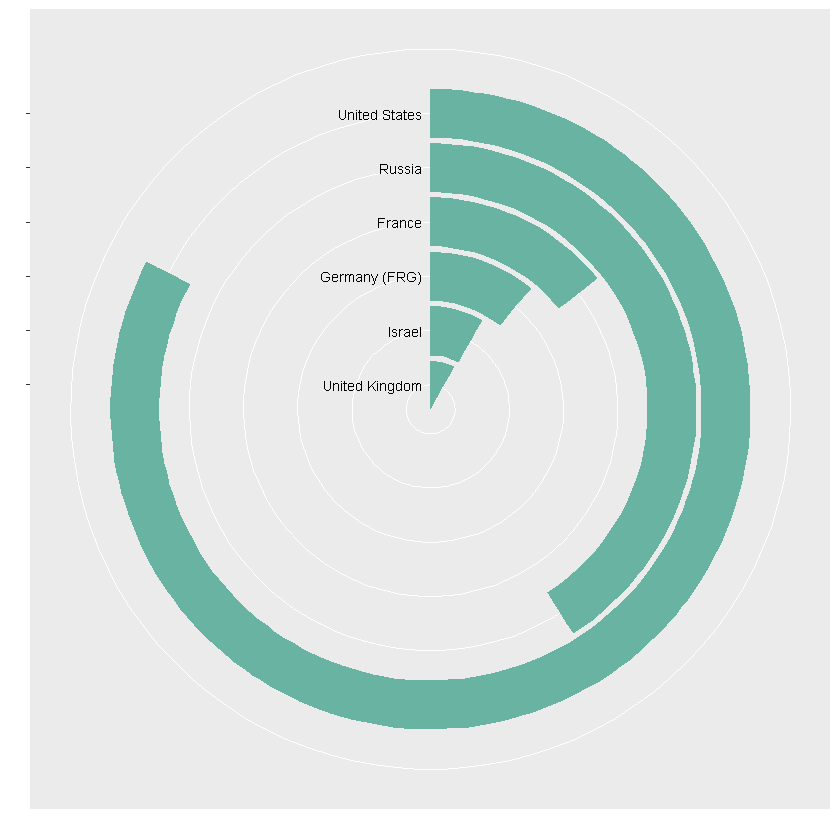

In [22]:
# 绘图
ggplot(data, aes(x=Country, y=Value) ) +
geom_bar(fill="#69b3a2", stat="identity") +
geom_text(hjust = 1, size = 3, aes( y = 0, label = paste(Country," "))) +
theme(
  panel.grid.minor.y = element_blank(),
  panel.grid.major.y = element_blank(),
  legend.position="none",
  axis.text = element_blank()
) +
xlab("") +
ylab("") +
# 使用极坐标
coord_polar(theta = "y") +
ylim(0,15000) 

显而易见这种图形的优点是非常引人注目。但是，由于条形图绘制在极轴的不同径向点上，因此它们具有不同的半径，无法通过长度进行比较。此图上还存在其他问题，如缺少Y轴。具体原因如下图所示。下图中如果想要知道第一幅环状条形图中各个条形数值关系，一般都是通过条形长度来判断。但是条形拉伸成弧长时会发生变形，导致比较结果为第二幅所示，但是实际各个条形数值关系结果为第三幅图。

![](image/img8_1.png)

## 解决方法

如果很关注数据量的展示，我们可以给环状条形图添加数值标签或者使用条形图，棒棒糖图。

### 添加数值标签

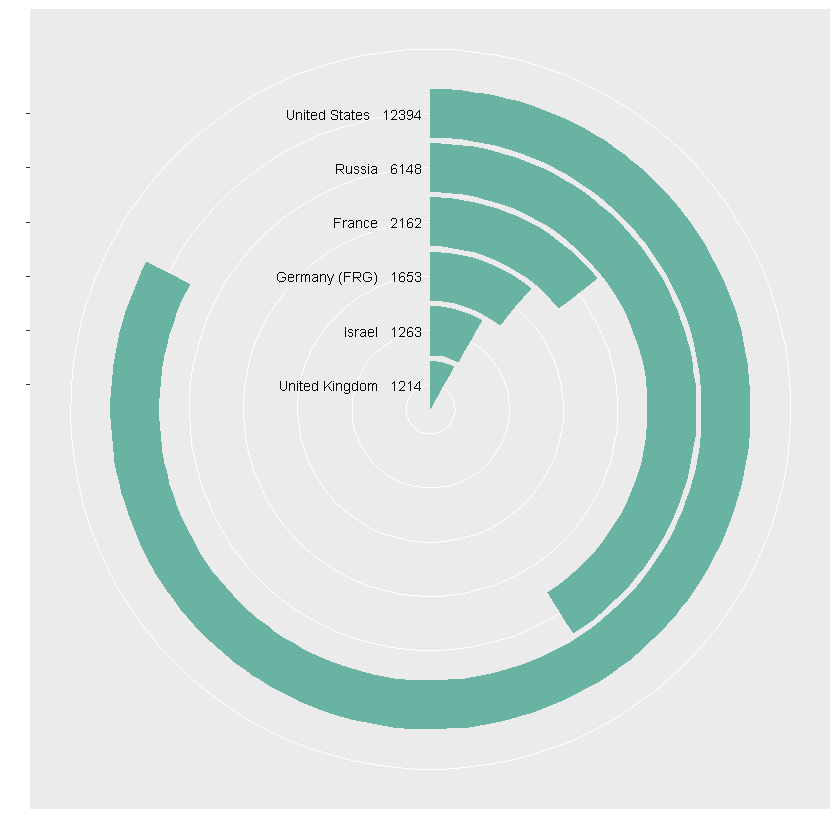

In [32]:
# 绘图
ggplot(data, aes(x=Country, y=Value) ) +
geom_bar(fill="#69b3a2", stat="identity") +
geom_text(hjust = 1, size = 3, aes( y = 0, label = paste(Country," ",Value," "))) +
theme(
  panel.grid.minor.y = element_blank(),
  panel.grid.major.y = element_blank(),
  legend.position="none",
  axis.text = element_blank()
) +
xlab("") +
ylab("") +
# 使用极坐标
coord_polar(theta = "y") +
ylim(0,15000) 

### 棒棒糖图

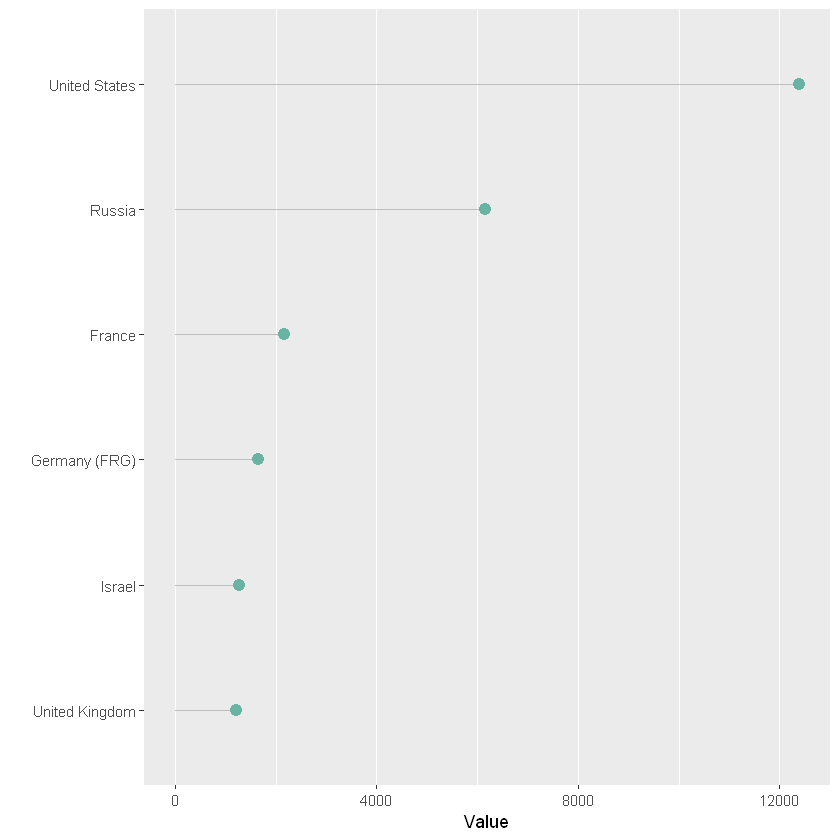

In [27]:
ggplot(data, aes(x=Country, y=Value) ) +
# 画线
geom_segment( aes(x=Country ,xend=Country, y=0, yend=Value), color="grey") +
geom_point(size=3, color="#69b3a2") +
# 翻转轴
coord_flip() +
theme(
  panel.grid.minor.y = element_blank(),
  panel.grid.major.y = element_blank(),
  legend.position="none"
) +
xlab("")

## 参考

+ [MIND THE RADIAL BAR CHARTS](https://www.data-to-viz.com/caveat/circular_barplot_accordeon.html)
+ [problems-barc-charts](https://www.visualisingdata.com/2017/09/problems-barc-charts/)